In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
#Uyarıları kapatmak için:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("veriseti_20220203_olimpiyatlar.csv")

In [3]:
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
data.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
data = data.drop(columns=["ID","Games"])

In [7]:
data.head()

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
unique_event = pd.unique(data.Event)

In [9]:
# Her bir etkinliği dolaşıp o etkinliğe katılanların boy ve kilo ortalamasını bulacağız daha sonra nan verileri bu değerlerle dolduracağız.

In [10]:
data_copy = data.copy() #gerçek veriyi bozmamak için bir kopyasını oluşturduk.

In [11]:
height_weight_list = ["Height","Weight"]
for e in unique_event: #etkinlik listesi içerisinde dolaşacağız.
    #etkinlik filtresi oluşturalım:
    event_filter = data_copy.Event == e
    #veriyi etkinliğe göre filtreleyelim:
    data_filtered = data_copy[event_filter]
    
    #boy ve kilo için etkinlik özelinde ortalamaları hesaplaycağız:
    for s in height_weight_list:
        mean = np.round(np.mean(data_filtered[s]),2)
        if ~np.isnan(mean): #Etkinliğe ait ortalama varsa:
            data_filtered[s] = data_filtered[s].fillna(mean)
            
        else: #Etkinlik özelinde ortalama yoksa ortalama hesapla:
            all_data_mean = np.round(np.mean(data[s]),2)# round noktadan sonra kaç rakama yuvarlayacağımızı belirtmemizi sağlar.
            data_filtered[s] = data_filtered[s].fillna(all_data_mean)
    
    #Etkinlik özelinde kayıp değerleri doldurulmuş veriyi, geçici veriye eşitleyeceğim.
    data_copy[event_filter] = data_filtered
    
#Kayıp değerleri giderilmiş geçici veriyi , gerçek veriye eşitleyelim:
data = data_copy.copy()
            
            
            

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [13]:
#Bu şekilde kayıp boy ve kilo verilerinin tümünü doldurmuş olduk.

In [14]:
print("Mean age : {}".format(np.mean(data["Age"])))
data["Age"] = data["Age"].fillna(np.round(np.mean(data["Age"]))) #Yaş küsuratlı olamayacağından yuvarladım.

Mean age : 25.556898357297374


In [15]:
data.info() # Yaş değerlerini de tüm verinin ortalamasına göre doldurduk.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [16]:
# Madalya alamamış sporcuları veri setinden çıkaracağım:
data = data[~data["Medal"].isnull()] # Madalya sütunu NaN olanlar dışındaki sporcuları almak için veriyi filtrelemiş oldum.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Gender  39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Year    39783 non-null  int64  
 8   Season  39783 non-null  object 
 9   City    39783 non-null  object 
 10  Sport   39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [18]:
#Temizlenmiş  veriyi daha sonra kullanabilmek için kaydedelim:
data.to_csv("Olympics_clean.csv",index=False)

In [19]:
def plot_Histogram(var):
    #Önce yazdığımız fonksu kısaca açıklayan yorumu yazıyoruz:
    """
    Girdi: Değişken/sütun ismi
    Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(data[var],bins=85,color="orange") #bins Eldeki verinin görsel olarak kaç parçaya bölüneceğini belirliyor.
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}".format(var))
    plt.show()

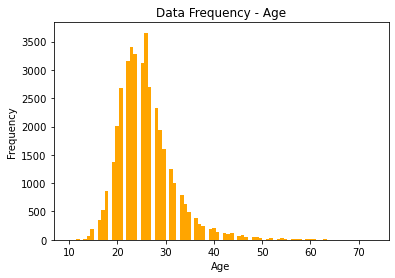

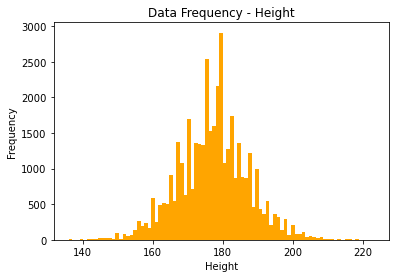

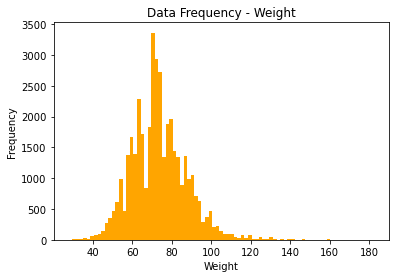

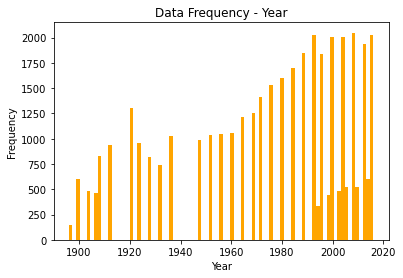

In [20]:
#Tüm sayısal değişkenler için histogramları çizdirelim:
numeric_var = ["Age","Height","Weight","Year"]
for i in numeric_var:
    plot_Histogram(i)

In [21]:
#Sayısal verinin istatiksel özelliklerini inceleyelim:
data.describe()

,Age,Height,Weight,Year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.926552,177.336690,73.738320,1973.943845
std,5.859372,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


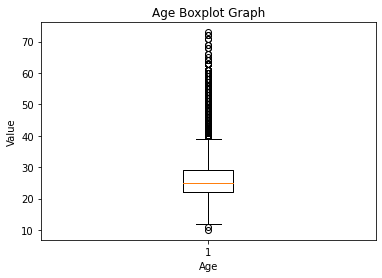

In [22]:
# Yaş özelliğini kutu grafiği ile inceleyelim:
plt.boxplot(data["Age"])
plt.title("Age Boxplot Graph")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

In [23]:
#Kategorik değişkenler için: Sütun Grafiği kullanırız
#Önce bar graph çizdireceğimiz metodu yazalım:
def plot_Bar(var , n = 5): #n En çok görülen kaç değeri sütun olarak çizdireceğimizi belirtir.
    """
    Girdi: Değişken ismi
    n : Gösterilecek en sık rastlanan eşsiz değer sayısı
    Çıktı : Sütun grafiği
    """
    data_ = data[var]
    data_count = data_.value_counts()
    data_count = data_count[:n] # ilk n sıklıkltaki değeri alacağız.
    plt.figure()
    plt.bar(data_count.index,data_count,color="orange")
    plt.xticks(data_count.index,data_count.index.values)
    plt.xticks(rotation=45) #etiketlerin sütunların altında eğil bir şekilde bulunması için
    plt.ylabel("Frequency")
    plt.title("Frequency of {} BarGraph".format(var))
    plt.show()
    print("{} : \n {}".format(var , data_count))

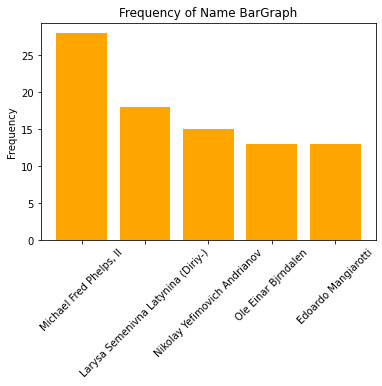

Name : 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: Name, dtype: int64


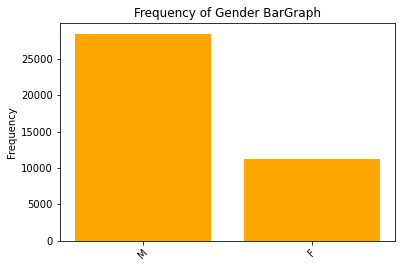

Gender : 
 M    28530
F    11253
Name: Gender, dtype: int64


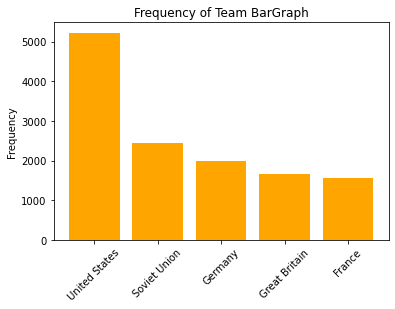

Team : 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: Team, dtype: int64


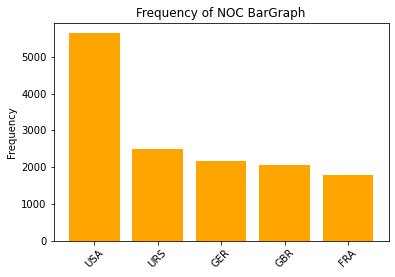

NOC : 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: NOC, dtype: int64


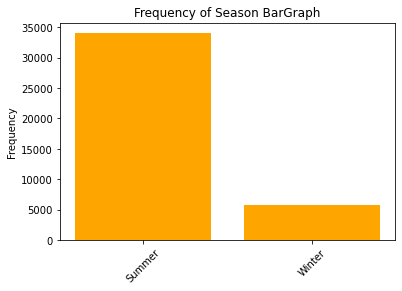

Season : 
 Summer    34088
Winter     5695
Name: Season, dtype: int64


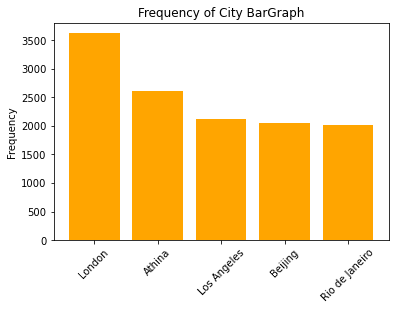

City : 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: City, dtype: int64


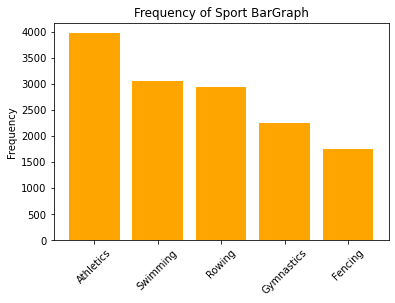

Sport : 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: Sport, dtype: int64


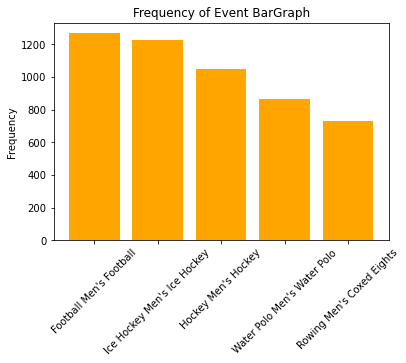

Event : 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: Event, dtype: int64


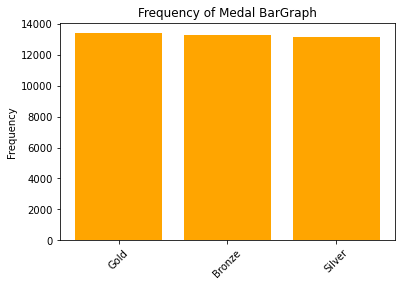

Medal : 
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [24]:
chategoric_var = ["Name","Gender","Team","NOC","Season","City","Sport","Event","Medal"]
for i in chategoric_var:
    plot_Bar(i)

# İki Değişkenli Veri Analizi:

In [25]:
data_male = data[data["Gender"]=="M"]
data_female = data[data["Gender"]!="M"]

In [26]:
data_male.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [27]:
data_female.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


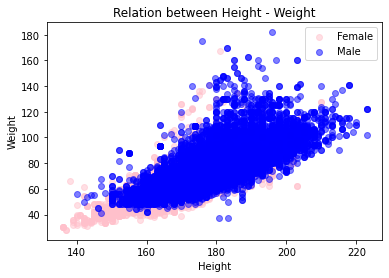

In [28]:
plt.figure()
plt.scatter(data_female.Height,data_female.Weight,alpha=0.5,label="Female",color="pink")#alpha değeri transparanlık sağlıyor.
plt.scatter(data_male.Height,data_male.Weight,alpha=0.5,label="Male",color="blue")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relation between Height - Weight")
plt.legend()
plt.show()

In [29]:
# Bu grafikten boy ile kilonun pozitif korelasyonu olduğunu anlayabiliyoruz.

# Sayısal Veriler Arasında İlişki İncelemesi

In [30]:
data.loc[:,["Age","Height","Weight"]].corr() #loc ile verinin hangi kısmını almak istediğimizi belirttik bütün satırları ve sayısal veri olan yaş boy kilo sütunlarını aldık .corr metodu ile de bu sütunlar arası korelasyonun tablosunu çıkaracağız.

,Age,Height,Weight
Age,1.000000,0.061727,0.136404
Height,0.061727,1.000000,0.794368
Weight,0.136404,0.794368,1.000000


In [31]:
#Grafikten çıkarımını yaptığımız boy kilo korelasyonunu buradan da görebiliriz.

# Madalya ve Yaş Arasındaki İlişki:

In [32]:
#Sporcularımızı altın , gümüş ve bronz madalyaya göre ayıralım:
data_temp = data.copy()
data_temp = pd.get_dummies(data_temp,columns=["Medal"])# bir kategorik sütunun elemanlarını ayrı sütunlar olarak verimize ekledik.
data_temp.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [33]:
data_temp.loc[:,["Age","Medal_Bronze","Medal_Gold","Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005407,-0.002968,0.008408
Medal_Bronze,-0.005407,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002968,-0.504110,1.000000,-0.499022
Medal_Silver,0.008408,-0.496859,-0.499022,1.000000


In [34]:
# Madalya kazanmak ile yaş arasında anlamlı bir ilinti bulunmamakta

# Takımların Kazandıkları Altın , Gümüş , Bronz Madalya Sayısı:

In [35]:
data_temp.loc[:,["Team","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["Team"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,Team,Medal_Bronze,Medal_Gold,Medal_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


# Şehre Göre Madalya Kazanımı:


In [36]:
data_temp.loc[:,["City","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["City"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,City,Medal_Bronze,Medal_Gold,Medal_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


# Cinsiyete Göre Madalya Kazanımı:

In [37]:
data_temp.loc[:,["Gender","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["Gender"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)

,Gender,Medal_Bronze,Medal_Gold,Medal_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Çok Değişkenli Veri Analizi - Pivot Tablosu

In [38]:
data_pivot = data.pivot_table(index="Medal",columns=["Gender"],values=["Height","Weight","Age"],aggfunc={"Height":np.mean,"Weight":np.mean,"Age":[min,max,np.std]})
# İndex ile hangi özelliğe göre satırda ayrıştıracağını belirtiyoruz.
# Columns ile hangi özelliğe göre sütunda ayrıştıracağımızı belirityoruz.
# Values ile hangi özelliklerin değerlerini bu satır ve sütuna göre yazacağımızı belirtiyoruz.
# Aggfunc ile de her özellik için ne gibi ekstra özellikleri belirtebileceğimizi seçebiliyoruz.
data_pivot.head()

Age                                            Height              \
         max         min             std                  mean               
Gender     F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329416  5.869104  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219710  5.987016  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253290  6.096383  170.233783  180.053626   

           Weight             
             mean             
Gender          F          M  
Medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

# Anomali Tespiti

In [39]:
def detect_Anomaly(df , attributes):
    outlier_indices = []
    
    for c in attributes:
        #1. Çeyrek:
        Q1 = np.percentile(df[c],25) # percentile metodu verinin yüzde kaçlık elemanını istersek onu bize döndürür.
        
        #3. Çeyrek:
        Q3 = np.percentile(df[c],75)
        
        #IQR = Inter Quartile Range
        IQR = Q3 - Q1
        
        #aykırı değer için ek adım miktarı:
        outlier_step = 1.5 * IQR
        
        #aykırı değeri ve bulunduğu indeksi tespit edelim:
        outlier_list = df[(df[c] < (Q1 - outlier_step)) | (df[c] > (Q3 + outlier_step))] # or pandas serilerinde hata verdiğinden | kullandım. 
        
        #tespit edilen indisleri toplayalım:
        outlier_indices.extend(outlier_list) # extend elimizdeki listenin sonuna bir başka listeye benzer veri dizisini eklemeyi sağlar.
    
    #Eşsiz aykırı değerleri bulalım:
    outlier_indices = Counter(outlier_indices)
    
    #Eğer bir örnek v adet sütunda aykırı ise bunu aykırı kabul edelim:
    multiple_outliers = list(i for i , v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [40]:
data_anomaly = data.loc[detect_Anomaly(data,["Age","Height","Weight"])]
data_anomaly.Sport.value_counts()

KeyError: "None of [Index(['Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',\n       'Season', 'City', 'Sport', 'Event', 'Medal'],\n      dtype='object')] are in the [index]"

Yukarıdaki hatayı çözmek üzere sonraya bıraktım.

# Zaman Serilerinde Veri Analizi

## Yıllara Göre Ortalama Yaş , Boy , Kilo Değişimi

## Yıllara Göre Madalya Sayıları

In [41]:
data_time = data.copy()

In [42]:
unique_years = data_time.Year.unique() # Olimpiyatların yapıldığı yılları elde ettik

In [43]:
unique_years

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [44]:
sorted_years = np.sort(data_time.Year.unique())

In [45]:
sorted_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

In [46]:
# Veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim

In [47]:
date_time_object = pd.to_datetime(data_time["Year"],format="%Y")
print(type(date_time_object))
date_time_object.head() # Yıl sütununu datetime cinsinden veriye dönüştürdük.

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
41   1948-01-01
Name: Year, dtype: datetime64[ns]

In [48]:
data_time["Date_time"] = date_time_object

In [49]:
data_time.head()

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Date_time
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014-01-01
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948-01-01


In [50]:
# Veri_zaman değişekinin ana indexini datetime tipinde olan Date_time değerine güncelleyelim
data_time = data_time.set_index("Date_time")
data_time.drop("Year",axis="columns",inplace=True) # Date_time zaten year sütununu kapsadığı için year ı kaldırıyoruz.

In [51]:
data_time.head()

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
Date_time,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


## Yıllara Göre Ortalama Yaş , Boy , Kilo Değişimi

In [52]:
periodic_data = data_time.resample("2A").mean() # 2 yıllık periyotlarla sayısal değişkenlerin ortalama değerlerini gösteren bir tablo elde ettik.
periodic_data.head()

,Age,Height,Weight
Date_time,,,
1896-12-31,24.034965,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.885762,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.421811,177.241091,74.330823


In [53]:
# Kayıp verileri çıkaralım:
periodic_data.dropna(axis=0,inplace=True) # satırdan silmek istediğimiz için axis = 0 verdik.

In [54]:
periodic_data.head() # Olimpiyatların yapılmadaığı 2 yıllık periyotları çıkarmış olduk.

,Age,Height,Weight
Date_time,,,
1896-12-31,24.034965,174.280350,72.734056
1900-12-31,27.885762,177.882301,74.979950
1904-12-31,26.421811,177.241091,74.330823
1906-12-31,26.624454,176.347576,74.072183
1908-12-31,27.601685,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

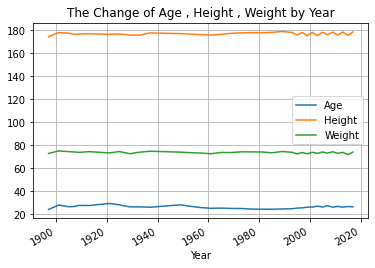

In [55]:
plt.figure()
periodic_data.plot()
plt.title("The Change of Age , Height , Weight by Year")
plt.xlabel("Year")
plt.grid(True) # Grafik üzerine kılavuz çizgisi çizdirmemizi sağlıyor.
plt.show()

In [56]:
# Görüldüğü üzere yıla bağlı olarak kilo yaş ve boy değerlerinde kaydadeğer bir değişim yoktur.

# Yıllara Göre Madalya Sayıları

In [57]:
data_time = pd.get_dummies(data_time , columns=["Medal"])
data_time.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [58]:
periodic_data = data_time.resample("2A").sum()

In [59]:
periodic_data.head(3)

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,
1896-12-31,3437.0,24922.09,10400.97,38.0,62.0,43.0
1898-12-31,0.0,0.00,0.00,0.0,0.0,0.0
1900-12-31,16843.0,107440.91,45287.89,175.0,201.0,228.0


In [60]:
# Kayıp verileri çıkaralım:
periodic_data = periodic_data[~(periodic_data==0).any(axis=1)] # en az bir verisi 0 olmayan satırları yani yılları alıyoruz.

In [61]:
periodic_data.head()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,
1896-12-31,3437.0,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16843.0,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12841.0,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12194.0,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22937.0,146806.47,61262.24,256.0,294.0,281.0


In [62]:
periodic_data.tail()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


Text(0.5, 1.0, 'Medal Number by Year')

<Figure size 432x288 with 0 Axes>

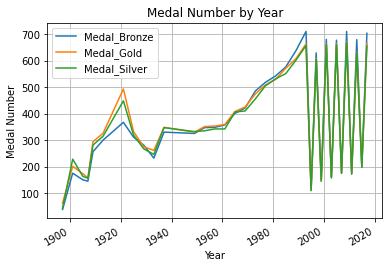

In [69]:
plt.figure()
periodic_data.loc[:,["Medal_Bronze","Medal_Gold","Medal_Silver"]].plot()
plt.xlabel("Year")
plt.ylabel("Medal Number")
plt.legend()
plt.grid(True)
plt.title("Medal Number by Year")

In [70]:
# Bir yerden sonra olimpiyatların sıklaştığını yaz ve kış olimpiyatı olarak yapıldığını buradan görebiliriz.

# Yıllara ve Szeonlara Göre Madalya Sayıları

In [71]:
Summer_data = data_time[data_time.Season == "Summer"]

In [72]:
Summer_data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [73]:
Winter_data = data_time[data_time.Season == "Winter"]

In [74]:
Winter_data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [75]:
periodic_winter = Winter_data.resample("A").sum()
periodic_winter = periodic_winter[~(periodic_winter==0).any(axis=1)]
periodic_winter.head(3)

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,
1924-12-31,3924.0,22867.28,9703.58,37,55,38
1928-12-31,2266.0,15745.75,6862.50,31,30,28
1932-12-31,2431.0,16357.71,7067.76,28,32,32


In [76]:
periodic_summer = Summer_data.resample("A").sum()
periodic_summer = periodic_summer[~(periodic_summer==0).any(axis=1)]
periodic_summer.head(3)

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_time,,,,,,
1896-12-31,3437.0,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16843.0,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12841.0,86139.17,36124.78,150.0,173.0,163.0


Text(0.5, 1.0, 'Medal Number by Year for Summer Season')

<Figure size 432x288 with 0 Axes>

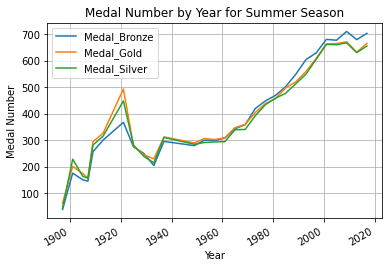

In [77]:
plt.figure()
periodic_summer.loc[:,["Medal_Bronze","Medal_Gold","Medal_Silver"]].plot()
plt.xlabel("Year")
plt.ylabel("Medal Number")
plt.legend()
plt.grid(True)
plt.title("Medal Number by Year for Summer Season")

Text(0.5, 1.0, 'Medal Number by Year for Winter Season')

<Figure size 432x288 with 0 Axes>

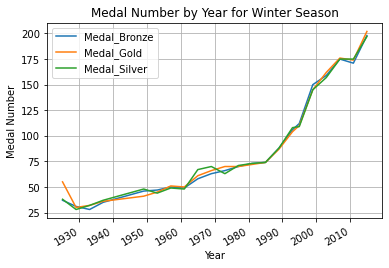

In [78]:
plt.figure()
periodic_winter.loc[:,["Medal_Bronze","Medal_Gold","Medal_Silver"]].plot()
plt.xlabel("Year")
plt.ylabel("Medal Number")
plt.legend()
plt.grid(True)
plt.title("Medal Number by Year for Winter Season")